In [1]:
import numpy as np
import sktime
import matplotlib.pyplot as plt 
import torch
from pathlib import Path


In [2]:
%load_ext autoreload
%autoreload 2

In [6]:
from sktime.annotation.clasp import ClaSPSegmentation, find_dominant_window_sizes

In [13]:
period_size = find_dominant_window_sizes(sine_waves[10])
period_size
clasp = ClaSPSegmentation(period_length=period_size, n_cps = 5, fmt = "sparse")

found_cps = clasp.fit_predict(sine_waves[0])
profiles = clasp.profiles
scores = clasp.scores

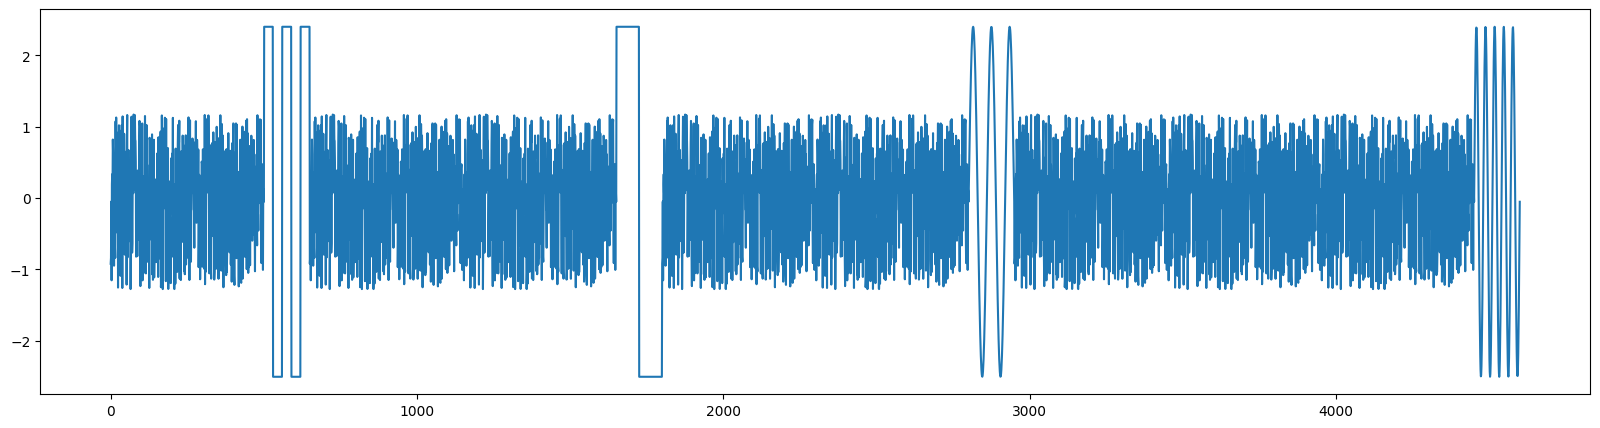

In [184]:
# Define the three sequences
sin = np.sin(np.linspace(0, 5 * np.pi,150))
sin_2 = np.sin(np.linspace(0, 10* np.pi,150))
square = np.sign(
        np.sin(np.linspace(0, 5 * np.pi, 150)))
square_2 = np.sign(
        np.sin(np.linspace(0, 2 * np.pi, 150)))



noise = np.random.uniform(-.5, .5, 500)
# Scale the data to range from -1 to 1
# noise = 2 * (noise - np.min(noise)) / (np.max(noise) - np.min(noise)) - 1


data = z_score(np.concatenate([noise, square, noise, noise, square_2, noise, noise, sin, noise, noise, noise, sin_2]))
fig, ax= plt.subplots(figsize = (20,5))
ax.plot(data)


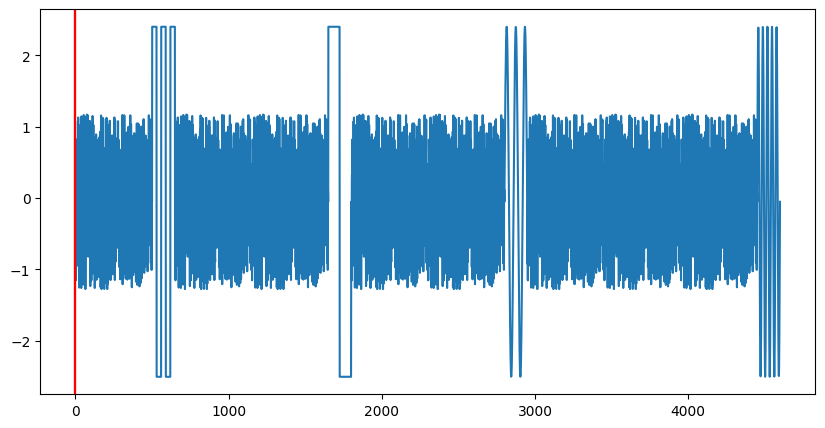

In [239]:
period_size = find_dominant_window_sizes(data)
period_size
clasp = ClaSPSegmentation(period_length=2, n_cps = 4, exclusion_radius=.001)

found_cps = clasp.fit_predict(data)
profiles = clasp.profiles
scores = clasp.scores
fig, ax = plt.subplots(nrows = 1, figsize = (10,5))
ax.plot(data) 
for i in found_cps:
    ax.axvline(x = i, color = 'red')